# Prog6280b - Starbucks

In [73]:
%pip install pandas seaborn matplotlib -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [74]:
# Read dataset into dataframe
df = pd.read_csv('../data/starbucks.csv')
df.columns = df.columns.str.strip()  # Get rid of trailing spaces in column names
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

Task 1: Caloric Content Across Beverage Categories

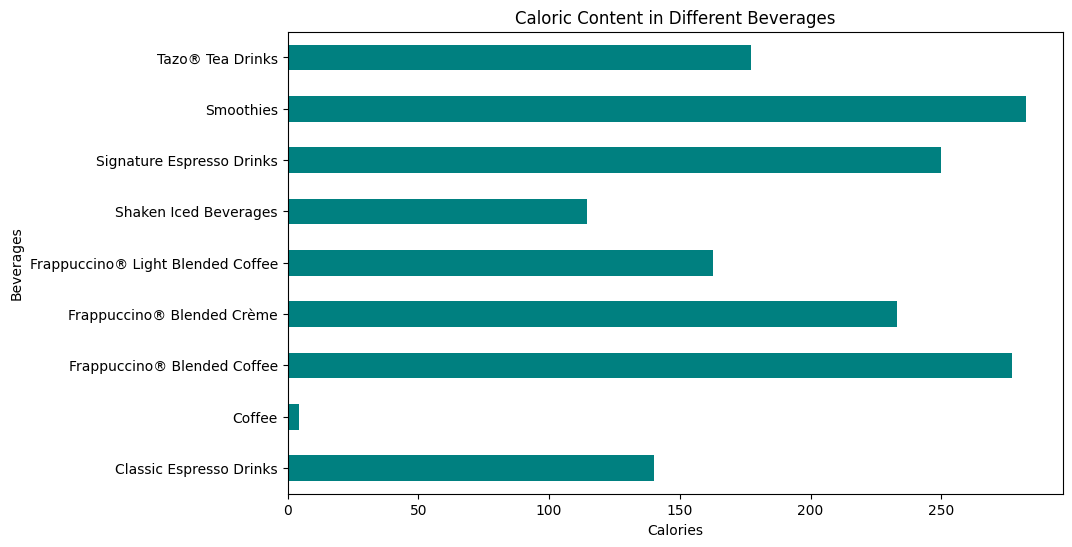

In [76]:
plt.figure(figsize=(10,6))
df.groupby('Beverage_category')['Calories'].mean().plot(kind='barh', color='teal')
plt.title('Caloric Content in Different Beverages')
plt.ylabel('Beverages')
plt.xlabel('Calories')
plt.show()

Smoothies seem to have the highest caloric content while coffee has the lowest.

Task 2: Fat Content in Different Beverages

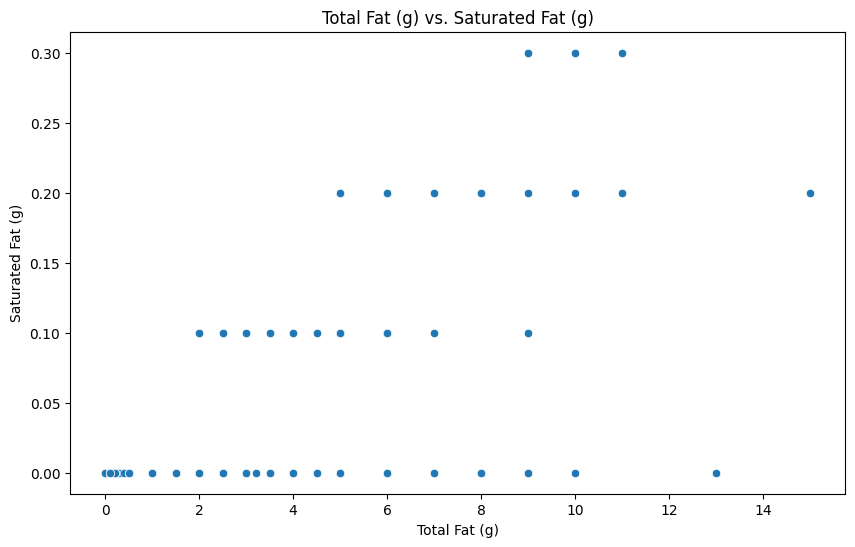

In [77]:
plt.figure(figsize=(10,6))
df['Total Fat (g)'] = df['Total Fat (g)'].str.replace(' ', '.').astype(float)
sns.scatterplot(x='Total Fat (g)', y='Saturated Fat (g)', data=df)
plt.title('Total Fat (g) vs. Saturated Fat (g)')
plt.xlabel('Total Fat (g)')
plt.ylabel('Saturated Fat (g)')
plt.show()

The more total fat a drink has seems to correlate with the amount of saturated fat there is, where more saturated fat is more total fat.

Task 3: Caffeine Content Variation

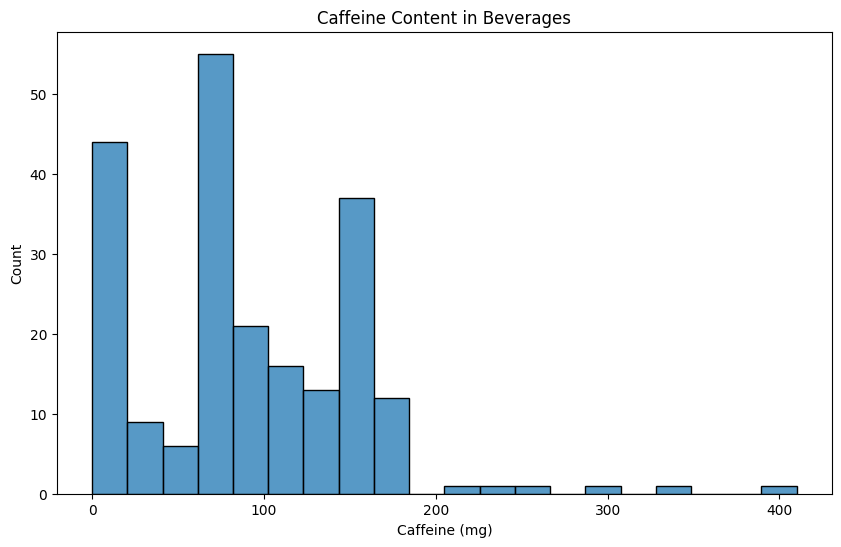

In [78]:
sorted_df = df.sort_values(by='Caffeine (mg)', ascending=True)
sorted_df['Caffeine (mg)'] = pd.to_numeric(sorted_df['Caffeine (mg)'], errors='coerce')
plt.figure(figsize=(10,6))
sns.histplot(x='Caffeine (mg)', data=sorted_df, binwidth=20)
plt.title('Caffeine Content in Beverages')
plt.xlabel('Caffeine (mg)')
plt.show()

Most beverages have a caffeine content under 200.

Task 4: Nutritional Content Comparison

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='Beverage_category', y='Protein (g)', data=df)
# plt.title('Protein content in Beverages')
# plt.ylabel('Protein (g)')
# plt.xlabel('Beverages')
# plt.xticks(rotation=90)
# plt.show()

plt.figure(figsize=(16, 10))
plt, axs = plt.subplots(ncols=3)


TypeError: 'Figure' object is not callable

Coffee has the lowest protein, while smoothies have the highest.

In [80]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='Beverage_category', y='Sugars (g)', data=df)
# plt.title('Sugar Content in Beverages')
# plt.ylabel('Sugars (g)')
# plt.xlabel('Beverages')
# plt.xticks(rotation=90)
# plt.show()

Coffee has little to no sugar, while Frappuccino Blended Coffee has the highest content.

In [81]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='Beverage_category', y='Dietary Fibre (g)', data=df)
# plt.title('Dietary Fibre Content in Beverages')
# plt.ylabel('Dietary Fibre (g)')
# plt.xlabel('Beverages')
# plt.xticks(rotation=90)
# plt.show()

Coffee has the lowest dietary fibre while smoothies have the highest, and everything else has around the same in the middle.

Task 5: Vitamin and Mineral Contribution

AttributeError: 'Figure' object has no attribute 'title'

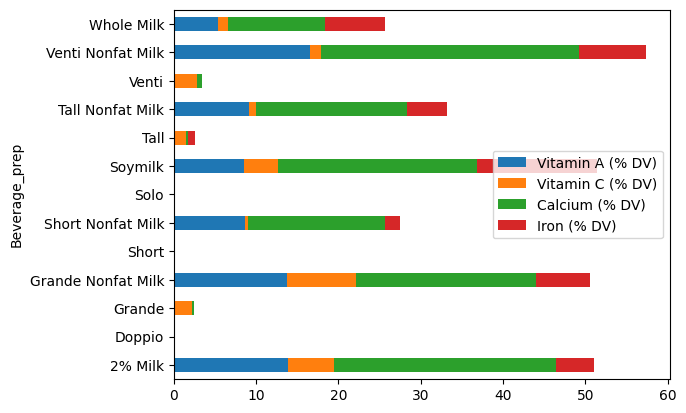

In [82]:
df['Vitamin A (% DV)'] = df['Vitamin A (% DV)'].astype(str).str.replace('%', '').astype(float)
df['Vitamin C (% DV)'] = df['Vitamin C (% DV)'].astype(str).str.replace('%', '').astype(float)
df['Calcium (% DV)'] = df['Calcium (% DV)'].astype(str).str.replace('%', '').astype(float)
df['Iron (% DV)'] = df['Iron (% DV)'].astype(str).str.replace('%', '').astype(float)
info = df.groupby('Beverage_prep')[['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']].mean()
ax = info.plot.barh(stacked=True)
plt.title('Vitamin and Mineral Contribution')
plt.xlabel('Beverages')
plt.ylabel('% DV')
plt.xticks(rotation=90)
plt.show()

Most of the beverages have a lot of calcium while vitamin c seems to have the lowest content among the drinks.